# BITS F464 - Machine Learning
## Assignment 2
Dhruv Merchant - 2020A7PS2063H  
Ishaan Srivastava - 2020A7PS2071H  
Ritvik - 2020A7PS1723H

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part B: Building a Basic Neural Network for Image Classification

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### Loading the MNIST Dataset

In [3]:
mnist_data = tf.keras.datasets.mnist

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist_data.load_data()

mnist_x = np.concatenate((mnist_x_train, mnist_x_test))
mnist_y = np.concatenate((mnist_y_train, mnist_y_test))

num_classification = len(np.unique(mnist_y))

print(f"Number of Images (Data): {mnist_x.shape[0]}")


Number of Images (Data): 70000


#### Data Preprocessing

In [4]:
# Each value in mnist_x is in the range 0 to 255 and the datatype is float. So here, it is being normalised from 0 to 1.

mnist_x = mnist_x / 255.0

#### Train-Test Split 

In [5]:
# List of Train-Test Splits
mnist_train_x = []
mnist_train_y = []

mnist_test_x = []
mnist_test_y = []

In [6]:
num_splits = 10

for i in range(0, 10):
    x_train, x_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.33, random_state=57+i)

    mnist_train_x.append(x_train)
    mnist_test_x.append(x_test)

    mnist_train_y.append(y_train)
    mnist_test_y.append(y_test)


In [7]:
print(f"Number of Images (Data) in Training Set: {mnist_train_x[0].shape[0]}")
print(f"Number of Images (Data) in Testing Set: {mnist_test_x[0].shape[0]}")

Number of Images (Data) in Training Set: 46900
Number of Images (Data) in Testing Set: 23100


#### ANN Models

In [8]:
ann_models = {}

num_models = 15

for split_num in range(num_splits):
    ann_models[split_num] = []

In [9]:
num_hidden_layers = [2, 3]
total_num_neurons = [100, 150]
activation_functions = ['tanh', 'sigmoid', 'relu']

In [10]:
for i in range(num_models):
    ann_model = tf.keras.Sequential()
    ann_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    num_hidden_layer = np.random.choice(num_hidden_layers)
    total_num_neuron = np.random.choice(total_num_neurons)

    for i in range(num_hidden_layer-1):
        num_neuron = np.random.randint(total_num_neuron/num_hidden_layer, total_num_neuron)
        total_num_neuron -= num_neuron
        activation_function = np.random.choice(activation_functions)
        ann_model.add(tf.keras.layers.Dense(num_neuron, activation=activation_function)) 

    activation_function = np.random.choice(activation_functions)
    ann_model.add(tf.keras.layers.Dense(total_num_neuron, activation=activation_function)) 

    ann_model.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    ann_model.summary()
    print("\n")
    
    for split_num in range(num_splits):
        ann_models[split_num].append(ann_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 104)               81640     
                                                                 
 dense_1 (Dense)             (None, 46)                4830      
                                                                 
 dense_2 (Dense)             (None, 10)                470       
                                                                 
Total params: 86,940
Trainable params: 86,940
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

In [ ]:
epochs = 5

for split_num in range(num_splits):
    print(f"Split Number: {split_num+1}")
    for i, ann_model in enumerate(ann_models[split_num]):
        print(f'Training model {i+1}...')
        ann_model.fit(mnist_train_x[split_num], mnist_train_y[split_num], epochs=epochs, validation_data=(mnist_test_x[split_num], mnist_test_y[split_num]))

In [12]:
results = {}

for split_num in range(num_splits):
    print(f"For Split {split_num+1}: ")
    results[split_num] = []
    for model in ann_models[split_num]:
        results[split_num].append(model.evaluate(mnist_test_x[split_num], mnist_test_y[split_num])[1])

For Split 1: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9966
For Split 2: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9967
For Split 3: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9962
For Split 4: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9970
For Split 5: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9966
For Split 6: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9967
For Split 7: 
722/722 [==============================] - 2s 2ms/step - loss: 0.0122 - accuracy: 0.9965
For Split 8: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9962
For Split 9: 
722/722 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.9959
For Split 10: 
722/722 [==============================] - 1s 2ms/step - l

In [19]:
best_accuracy = []
average_accuracy = []
best_accuracy_split = []

for i in range(num_models):
    best_accuracy.append(0)
    average_accuracy.append(0)
    best_accuracy_split.append(0)

    for split_num in range(num_splits):
        if results[split_num][i] > best_accuracy[i]:
            best_accuracy_split[i] = split_num
        best_accuracy[i] = max(best_accuracy[i], results[split_num][i])
        average_accuracy[i] += (results[split_num][i]/num_splits)

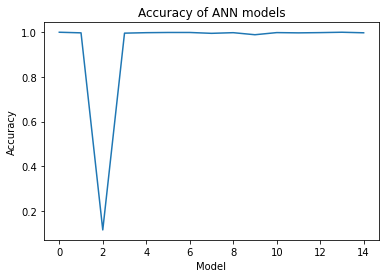

In [20]:
plt.plot(range(len(best_accuracy)), best_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of ANN models')
plt.show()

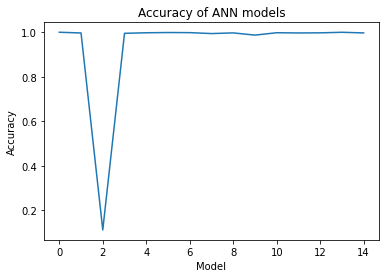

In [21]:
plt.plot(range(len(average_accuracy)), average_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of ANN models')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import itertools      

In [23]:
def plot_confusion_matrix(confusion_matrix, classes, title="Confusion Matrix", cmap = plt.cm.Blues):  
  plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = confusion_matrix.max() / 2.
  for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'), horizontalalignment = 'center', color = "white" if confusion_matrix[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

For Model 0
722/722 [==============================] - 2s 3ms/step


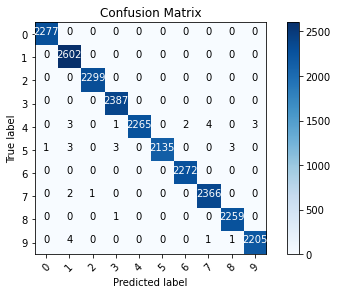

For Model 1
722/722 [==============================] - 2s 3ms/step


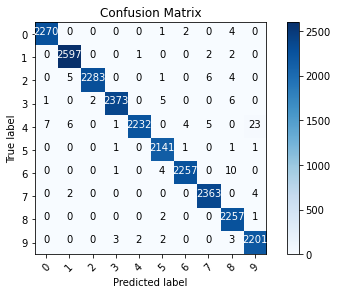

For Model 2
722/722 [==============================] - 2s 2ms/step


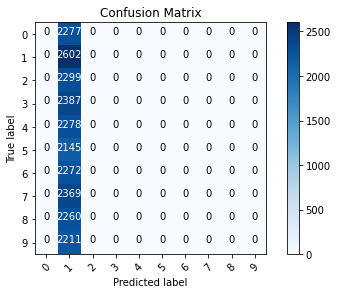

For Model 3
722/722 [==============================] - 2s 2ms/step


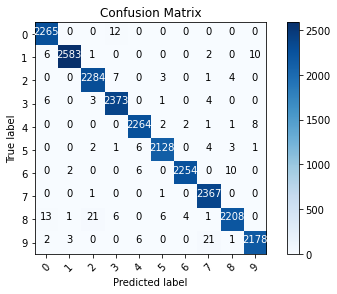

For Model 4
722/722 [==============================] - 4s 5ms/step


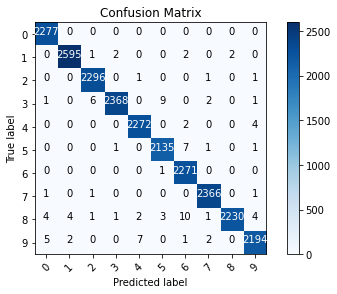

For Model 5
722/722 [==============================] - 4s 5ms/step


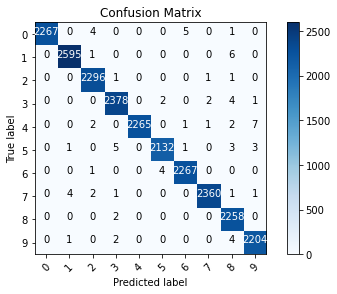

For Model 6
722/722 [==============================] - 3s 4ms/step


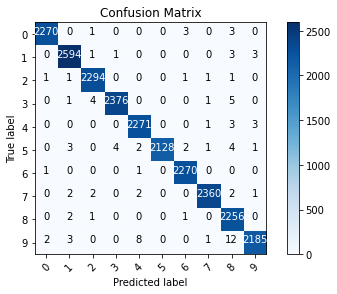

For Model 7
722/722 [==============================] - 3s 4ms/step


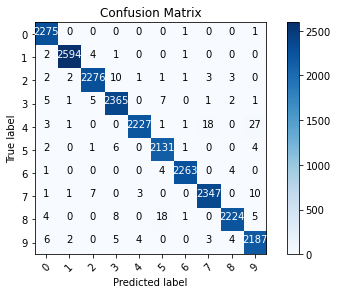

For Model 8
722/722 [==============================] - 4s 6ms/step


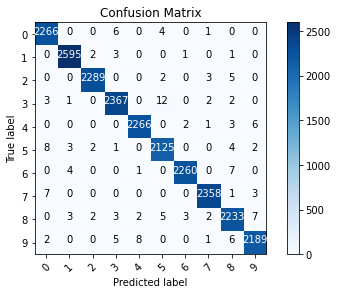

For Model 9
722/722 [==============================] - 3s 4ms/step


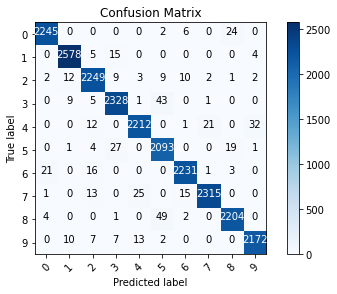

For Model 10
722/722 [==============================] - 2s 2ms/step


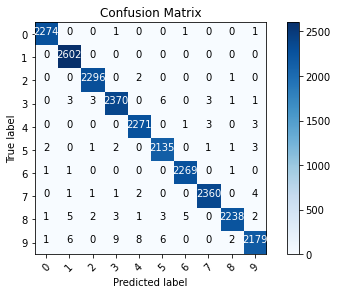

For Model 11
722/722 [==============================] - 2s 2ms/step


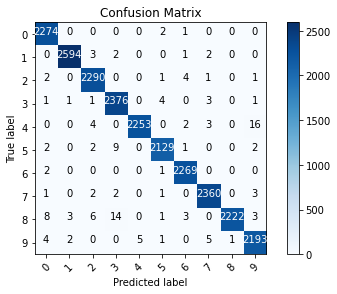

For Model 12
722/722 [==============================] - 1s 2ms/step


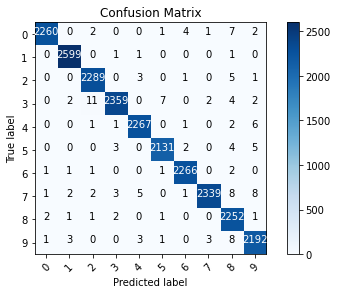

For Model 13
722/722 [==============================] - 2s 2ms/step


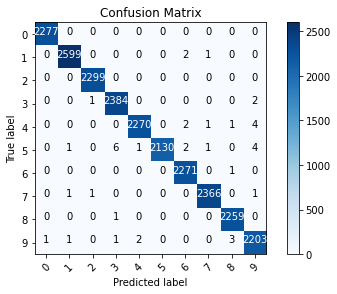

For Model 14
722/722 [==============================] - 2s 2ms/step


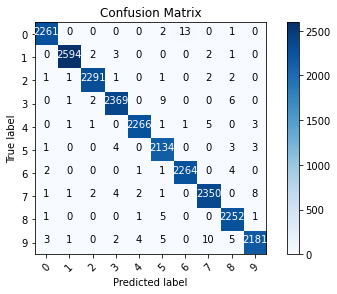

In [24]:
for i, best_accuracy_split_ind in enumerate(best_accuracy_split):
  print(f"For Model {i}")
  predicted_test = ann_models[split_num][i].predict(mnist_test_x[split_num]).argmax(axis=1)
  con_matrix = confusion_matrix(mnist_test_y[split_num], predicted_test)
  plot_confusion_matrix(con_matrix, list(range(10))) 